Imports

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

Load in the data

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:",x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


The data is only 2D

Convolution expects height x widht x color (3D)

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


Number of classes

In [ ]:
k = len(set(y_train))
print("number of classes:", k)

number of classes: 10


Build the model using the funcional API

In [ ]:
i = Input(x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

Compile and fit

Note: make sure you are using the GPU for this

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 19s 5ms/step - loss: 0.5187 - accuracy: 0.8066 - val_loss: 0.4031 - val_accuracy: 0.8516
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3602 - accuracy: 0.8651 - val_loss: 0.3453 - val_accuracy: 0.8726
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3116 - accuracy: 0.8826 - val_loss: 0.3193 - val_accuracy: 0.8839
Epoch 4/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2793 - accuracy: 0.8948 - val_loss: 0.3123 - val_accuracy: 0.8851
Epoch 5/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2528 - accuracy: 0.9029 - val_loss: 0.2854 - val_accuracy: 0.8991
Epoch 6/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2338 - accuracy: 0.9127 - val_loss: 0.2907 - val_accuracy: 0.8928
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2143 - accuracy: 0.9186 - val_loss: 0.2817 - val_acc

Plot loss per iteration

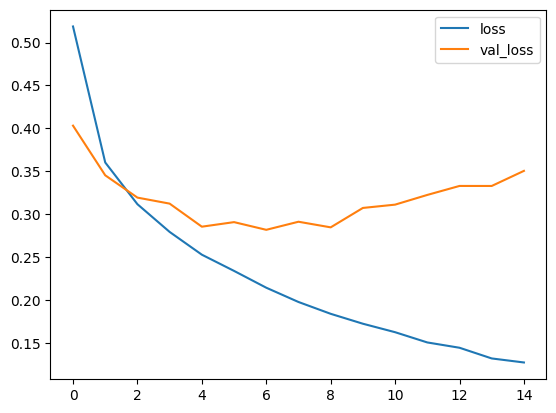

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

Plot accuracy per iteration

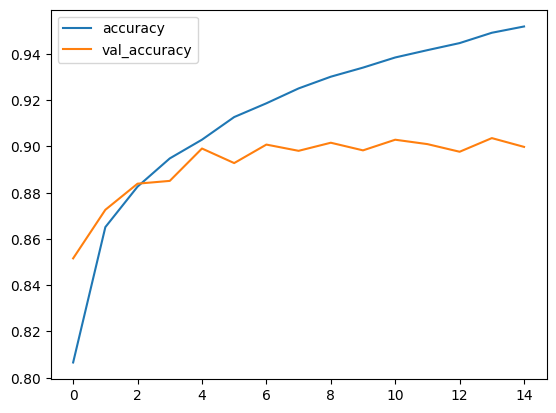

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

Plot confusion matrix

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[881   1  26  10   2   1  76   0   3   0]
 [  3 975   2  13   3   0   2   0   2   0]
 [ 15   1 866   7  49   0  62   0   0   0]
 [ 24   8  19 883  33   0  30   0   2   1]
 [  2   3  57  19 838   0  81   0   0   0]
 [  0   0   0   0   0 981   0  13   2   4]
 [151   1  57  19  77   0 686   0   9   0]
 [  0   0   0   0   0  12   0 974   0  14]
 [  6   1   3   3   4   3   8   2 967   3]
 [  1   0   0   0   0   9   0  43   0 947]]


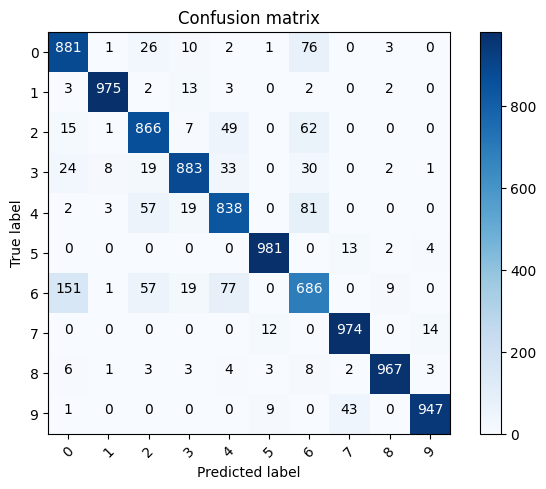

In [ ]:

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Label mapping

In [ ]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

Show some misclassified examples

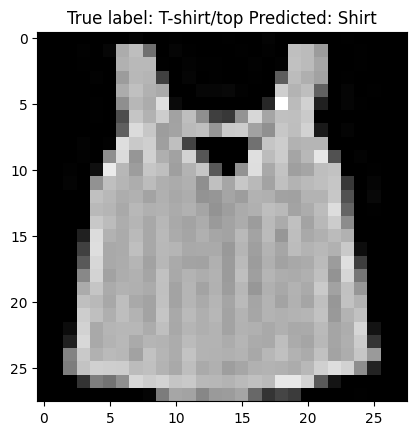

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));